In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Bar Chart: Payroll Employment Quarterly Change 

### 1.1 Import Dataset

In [21]:
payroll_employ = pd.read_fwf('table_e.txt', 
                            skiprows=7, skipfooter=1, header=None)
payroll_employ = payroll_employ.rename(columns={0: 'Year', 1: 'Month', 2: 'Total'})
payroll_employ

,Year,Month,Total,3,4,5,6,7,8,9,10,11
0,1992,September,694,66,41,64,111,80,74,43,26,189
1,NaN,December,193,11,37,36,53,44,51,27,25,-91
2,1993,March,340,50,0,6,21,33,63,42,42,83
3,NaN,June,677,65,50,48,62,45,61,56,66,224
4,NaN,September,"1,045",115,77,100,147,113,134,83,48,228
...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020,March,-610,-69,-63,-95,-141,-57,-45,-27,-29,-84
111,NaN,June,-15320,-809,-778,",205",",908",",291",",528",",087",",122",",592"
112,NaN,September,"4,040",401,289,363,452,254,288,227,273,",493"
113,NaN,December,"1,893",175,87,101,158,147,204,154,153,714


### 1.2 Convert missing values to corresponding years

In [22]:
def add_year(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert missing values into corresponding years.
    :param df: A DataFrame with original data.
    :return: A DataFrame that has been filled with missing year data.
    >>> df = pd.read_fwf('https://raw.githubusercontent.com/zao-YQW/2021Fall_finals/main/Data%20Simple%20from%20Bureau%20of%20Labor%20Statistics.txt',\
                            skiprows=11, skipfooter=1, header=None)
    >>> df = df.rename(columns={0: 'Year', 1: 'Month', 2: 'Total'})
    >>> print(df)
           Year      Month  Total      3    4    5      6    7    8
    0    1992.0  September     66    914  381  533    848  385  463
    1       NaN   December     11    878  378  500    867  380  487
    2    1993.0      March     50    893  376  517    843  378  465
    3       NaN       June     65    920  387  533    855  370  485
    4       NaN  September    115    938  389  549    823  379  444
    ..      ...        ...    ...    ...  ...  ...    ...  ...  ...
    110  2020.0      March    -69    968  347  621  1,037  366  671
    111     NaN       June   -809    934  348  586  1,743  595  148
    112     NaN  September    401  1,394  465  929    993  370  623
    113     NaN   December    175  1,101  382  719    926  352  574
    114  2021.0      March    272  1,099  401  698    827  318  509
    <BLANKLINE>
    [115 rows x 9 columns]
    >>> df = add_year(df)
    >>> print(df)
         Year      Month  Total      3    4    5      6    7    8
    0    1992  September     66    914  381  533    848  385  463
    1    1992   December     11    878  378  500    867  380  487
    2    1993      March     50    893  376  517    843  378  465
    3    1993       June     65    920  387  533    855  370  485
    4    1993  September    115    938  389  549    823  379  444
    ..    ...        ...    ...    ...  ...  ...    ...  ...  ...
    110  2020      March    -69    968  347  621  1,037  366  671
    111  2020       June   -809    934  348  586  1,743  595  148
    112  2020  September    401  1,394  465  929    993  370  623
    113  2020   December    175  1,101  382  719    926  352  574
    114  2021      March    272  1,099  401  698    827  318  509
    <BLANKLINE>
    [115 rows x 9 columns]
    """
    year = df['Year']
    pd.options.display.float_format = '{:.0f}'.format
    year.astype(float).sum()
    for i in range(1, len(year)):
        if year.isnull()[i]:
            df.loc[i,'Year'] = year[i - 1]
    
    return df
    

add_year(payroll_employ)
payroll_employ

,Year,Month,Total,3,4,5,6,7,8,9,10,11
0,1992,September,694,66,41,64,111,80,74,43,26,189
1,1992,December,193,11,37,36,53,44,51,27,25,-91
2,1993,March,340,50,0,6,21,33,63,42,42,83
3,1993,June,677,65,50,48,62,45,61,56,66,224
4,1993,September,"1,045",115,77,100,147,113,134,83,48,228
...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020,March,-610,-69,-63,-95,-141,-57,-45,-27,-29,-84
111,2020,June,-15320,-809,-778,",205",",908",",291",",528",",087",",122",",592"
112,2020,September,"4,040",401,289,363,452,254,288,227,273,",493"
113,2020,December,"1,893",175,87,101,158,147,204,154,153,714


### 1.3 Convert string type to float

In [23]:
def str_to_num(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Convert string data into numeric data.
    :param df: A DataFrame with original data.
    :param column_name: The name of the column need to be converted.
    :return: A DataFrame that already convert certain columns into numeric data.
    >>> lst = ['333', '444', '777']
    >>> df = pd.DataFrame(lst)
    >>> df = df.rename(columns={0: 'Year'})
    >>> df = str_to_num(df, 'Year')
    >>> print(df)
        Year
    0  333.0
    1  444.0
    2  777.0
    """
    df[column_name] = df[column_name].astype(str).str.replace(',', '').astype(float)  
    return df

In [24]:
str_to_num(payroll_employ, 'Total')
# Remove the thousands separator first, then convert to float
payroll_employ

,Year,Month,Total,3,4,5,6,7,8,9,10,11
0,1992,September,694,66,41,64,111,80,74,43,26,189
1,1992,December,193,11,37,36,53,44,51,27,25,-91
2,1993,March,340,50,0,6,21,33,63,42,42,83
3,1993,June,677,65,50,48,62,45,61,56,66,224
4,1993,September,1045,115,77,100,147,113,134,83,48,228
...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020,March,-610,-69,-63,-95,-141,-57,-45,-27,-29,-84
111,2020,June,-15320,-809,-778,",205",",908",",291",",528",",087",",122",",592"
112,2020,September,4040,401,289,363,452,254,288,227,273,",493"
113,2020,December,1893,175,87,101,158,147,204,154,153,714


### 1.4 Bar chart visualization 

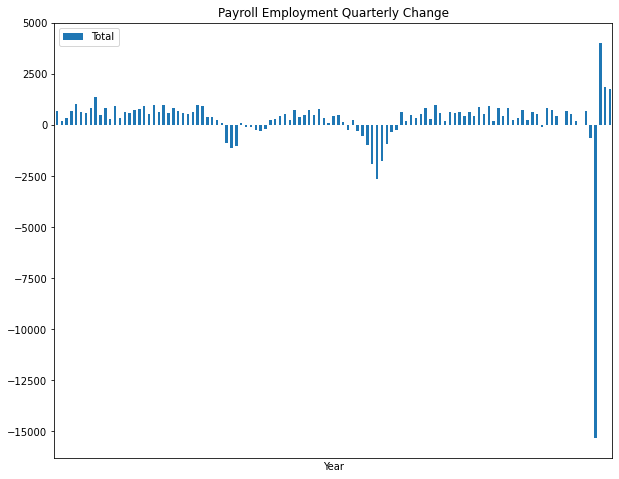

In [25]:
payroll_total = pd.DataFrame({'Year':payroll_employ['Year'], 'Total':payroll_employ['Total']})
payroll_fig = payroll_total.plot.bar(x='Year', y='Total', rot=0, figsize=(10,8), 
                                     title = 'Payroll Employment Quarterly Change')
payroll_fig = payroll_fig.set_xticks(range(1994,2022,50))

## 2. Line Charts: data sourced from Bureau of Labor Statistics

### 2.1 Import and process data

### 2.1.1 Import and process data

In [26]:
def read_txt(path: str) -> pd.DataFrame:
    """
    Read in file with its url.
    :param path: The url of the file.
    :return: A DataFrame with the fata from target file.
    >>> df = read_txt('https://raw.githubusercontent.com/zao-YQW/2021Fall_finals/main/Data%20Simple%20from%20Bureau%20of%20Labor%20Statistics.txt')
    >>> print(df)
         Year      Month  Net change  ...  Total Job Losses    7    8
    0    1992  September          66  ...               848  385  463
    1    1992   December          11  ...               867  380  487
    2    1993      March          50  ...               843  378  465
    3    1993       June          65  ...               855  370  485
    4    1993  September         115  ...               823  379  444
    ..    ...        ...         ...  ...               ...  ...  ...
    110  2020      March         -69  ...              1037  366  671
    111  2020       June        -809  ...              1743  595  148
    112  2020  September         401  ...               993  370  623
    113  2020   December         175  ...               926  352  574
    114  2021      March         272  ...               827  318  509
    <BLANKLINE>
    [115 rows x 9 columns]
    """
    txt_to_df = pd.read_fwf(path, skiprows=11, skipfooter=1, header=None)
    txt_to_df = txt_to_df.rename(columns={0: 'Year', 1: 'Month', 2: 'Net change', 3: 'Total Job Gains', 
                                          6: 'Total Job Losses'})
    
    str_to_num(txt_to_df, 'Net change')
    str_to_num(txt_to_df, 'Total Job Gains')
    str_to_num(txt_to_df, 'Total Job Losses')

    add_year(txt_to_df)  # Convert missing values to corresponding years by the function
    
    return txt_to_df

job_class1 = read_txt('f.01.table1_d.txt')
job_class2 = read_txt('f.02.table1_d.txt')
job_class3 = read_txt('f.03.table1_d.txt')
job_class4 = read_txt('f.04.table1_d.txt')
job_class5 = read_txt('f.05.table1_d.txt')
job_class6 = read_txt('f.06.table1_d.txt')
job_class7 = read_txt('f.07.table1_d.txt')
job_class8 = read_txt('f.08.table1_d.txt')
job_class9 = read_txt('f.09.table1_d.txt')

# Create lists based on the number of employees
small_list = [job_class1, job_class2, job_class3, job_class4]  # 1-49 employees
medium_list = [job_class5, job_class6, job_class7]  # 50-499 employees
large_list = [job_class8, job_class9]  # 499+ employees

### 2.2 Calculate net job creation, total job gains, and total job losses based on firm size

In [27]:
def classify_firm(df_list: list) -> pd.DataFrame:
    """
    This function is used to create new DataFrame for each type of firm with following columns:
    Year, Month, Net Change, Total Job Gains, Total Job Losses.
    :param df_list: A list created by merging several data files.
    :return: A DataFrame with following columns: Year, Month, Net Change, Total Job Gains, Total Job Losses.
    >>> df = read_txt('https://raw.githubusercontent.com/zao-YQW/2021Fall_finals/main/Data%20Simple%20from%20Bureau%20of%20Labor%20Statistics.txt')
    >>> lst = [df]
    >>> lst = classify_firm(lst)
    >>> print(lst)
         Year      Month  Net Change  Total Job Gains  Total Job Losses
    0    1992  September          66              914               848
    1    1992   December          11              878               867
    2    1993      March          50              893               843
    3    1993       June          65              920               855
    4    1993  September         115              938               823
    ..    ...        ...         ...              ...               ...
    110  2020      March         -69              968              1037
    111  2020       June        -809              934              1743
    112  2020  September         401             1394               993
    113  2020   December         175             1101               926
    114  2021      March         272             1099               827
    <BLANKLINE>
    [115 rows x 5 columns]
    """
    net_change, total_job_gains, total_job_losses, gains_minus_losses = 0,0,0,0
    
    for df in df_list:
        net_change += df['Net change']
        total_job_gains += df['Total Job Gains']
        total_job_losses += df['Total Job Losses']
    
    size_firm = pd.DataFrame({'Year': df['Year'], 'Month': df['Month'], 'Net Change': net_change,
                              'Total Job Gains': total_job_gains, 'Total Job Losses': total_job_losses})
    
    return size_firm

small_firm = classify_firm(small_list)
medium_firm = classify_firm(medium_list)
large_firm = classify_firm(large_list)
small_firm

,Year,Month,Net Change,Total Job Gains,Total Job Losses
0,1992,September,282,3341,3059
1,1992,December,137,3259,3122
2,1993,March,77,3178,3101
3,1993,June,225,3249,3024
4,1993,September,439,3412,2973
...,...,...,...,...,...
110,2020,March,-368,3026,3394
111,2020,June,-474,2552,5252
112,2020,September,1505,4483,2978
113,2020,December,521,3496,2975


### 2.3 Calculate contribution to job gains relative to job losses based on firm size

In [28]:
def create_relative(main_firm: pd.DataFrame, small_firm: pd.DataFrame, 
                    medium_firm: pd.DataFrame, large_firm: pd.DataFrame) -> pd.DataFrame:
    """
    This function is used to calculate the value of gains relative to losses for each type of firm.
    :param main_firm: The firm need to caculate the value of gains relative to losses.
    :param small_firm: A DataFrame with following info of small firm: Year, Month, Net Change, Total Job Gains, Total Job Losses.
    :param medium_firm: A DataFrame with following info of medium firm: Year, Month, Net Change, Total Job Gains, Total Job Losses.
    :param large_firm: A DataFrame with following info of large firm: Year, Month, Net Change, Total Job Gains, Total Job Losses.
    :return: A DataFrame added the gains relative to losses column.
    >>> df = read_txt('https://raw.githubusercontent.com/zao-YQW/2021Fall_finals/main/Data%20Simple%20from%20Bureau%20of%20Labor%20Statistics.txt')
    >>> lst1, lst2, lst3 = [df], [df], [df]
    >>> lst1, lst2, lst3 = classify_firm(lst1), classify_firm(lst2), classify_firm(lst3)
    >>> df = create_relative(lst1, lst1, lst2, lst3)
    >>> print(df)
         Year      Month  ...  Total Job Losses  Gains Relative to Losses
    0    1992  September  ...               848                         1
    1    1992   December  ...               867                         1
    2    1993      March  ...               843                         1
    3    1993       June  ...               855                         1
    4    1993  September  ...               823                         1
    ..    ...        ...  ...               ...                       ...
    110  2020      March  ...              1037                         1
    111  2020       June  ...              1743                         1
    112  2020  September  ...               993                         1
    113  2020   December  ...               926                         1
    114  2021      March  ...               827                         1
    <BLANKLINE>
    [115 rows x 6 columns]
    """
    main_firm['Gains Relative to Losses'] = (main_firm['Total Job Gains']/(small_firm['Total Job Gains']+
                                          medium_firm['Total Job Gains']+large_firm['Total Job Gains'])
                                         )/(main_firm['Total Job Losses']/(small_firm['Total Job Losses']+
                                          medium_firm['Total Job Losses']+large_firm['Total Job Losses']))
    return main_firm

small_firm = create_relative(small_firm, small_firm, medium_firm, large_firm)
medium_firm = create_relative(medium_firm, small_firm, medium_firm, large_firm)
large_firm = create_relative(large_firm, small_firm, medium_firm, large_firm)
small_firm

,Year,Month,Net Change,Total Job Gains,Total Job Losses,Gains Relative to Losses
0,1992,September,282,3341,3059,1
1,1992,December,137,3259,3122,1
2,1993,March,77,3178,3101,1
3,1993,June,225,3249,3024,1
4,1993,September,439,3412,2973,1
...,...,...,...,...,...,...
110,2020,March,-368,3026,3394,1
111,2020,June,-474,2552,5252,1
112,2020,September,1505,4483,2978,1
113,2020,December,521,3496,2975,1


### 2.4 Line chart visualization 

In [29]:
def create_line(small_firm: pd.DataFrame, medium_firm: pd.DataFrame, 
                large_firm: pd.DataFrame, column_name: str, title: str):
    """
    This function is used to create line chart for 'Net Job Creation', 'Gross Job Gains' and 'Gross Job Losses' data.
    :param small_firm: A DataFrame contains info of small firm.
    :param medium_firm: A DataFrame contains info of medium firm.
    :param large_firm: A DataFrame contains info of large firm.
    :param column_name: Used column in the DataFrame.
    :param title: Created line chart's title.
    :return: A line chart.
    """
    firm_df = pd.DataFrame({'Year': small_firm['Year'], 'Month': small_firm['Month'],
                       '1-49 employees': small_firm[column_name],
                       '50-499 employees': medium_firm[column_name],
                       '499+ employees': large_firm[column_name]})
    
    firm_df = firm_df.set_index(['Year', 'Month'])

    line = firm_df.plot.line(figsize=(14,9), title=title, xlabel='Year')
    line = line.set_xticklabels(range(1987, 2025, 5))
    
    return line

### 2.5.1 Line chart 1:  Net Job Creation

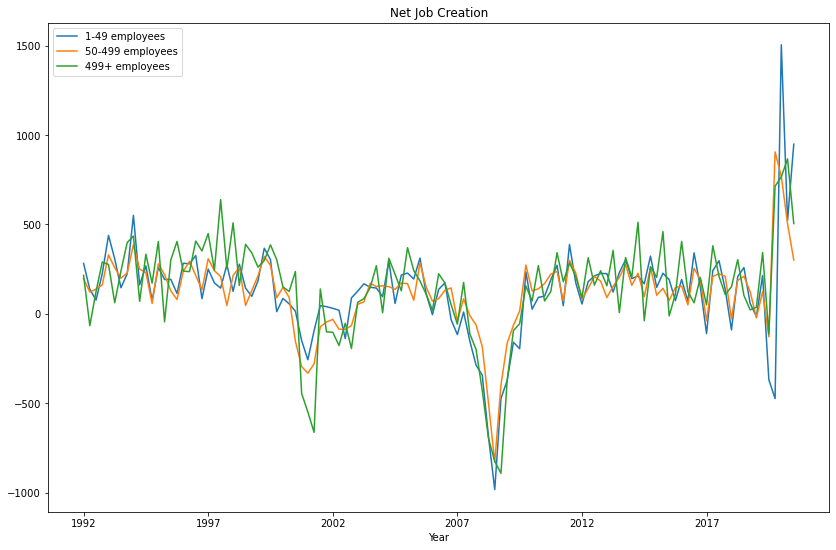

In [30]:
net_job_creation = create_line(small_firm, medium_firm, large_firm, 'Net Change', 'Net Job Creation')

### 2.5.2 Line chart 2:  Gross Job Gains

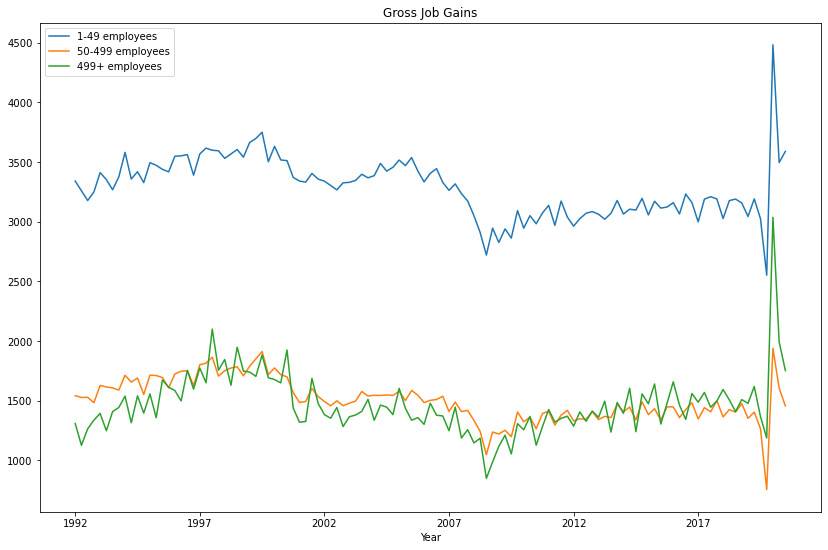

In [31]:
total_job_gains_line = create_line(small_firm, medium_firm, large_firm, 'Total Job Gains', 'Gross Job Gains')

### 2.5.3 Line chart 3:  Gross Job Losses

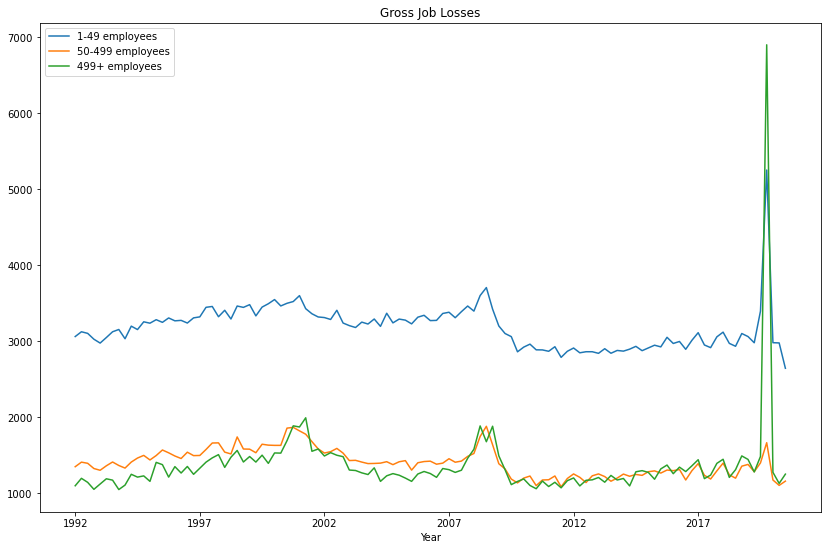

In [32]:
total_job_losses_line = create_line(small_firm, medium_firm, large_firm, 'Total Job Losses', 'Gross Job Losses')

### 2.5.4 Line chart 4:  Contribution to Job Gains Relative to Job Losses

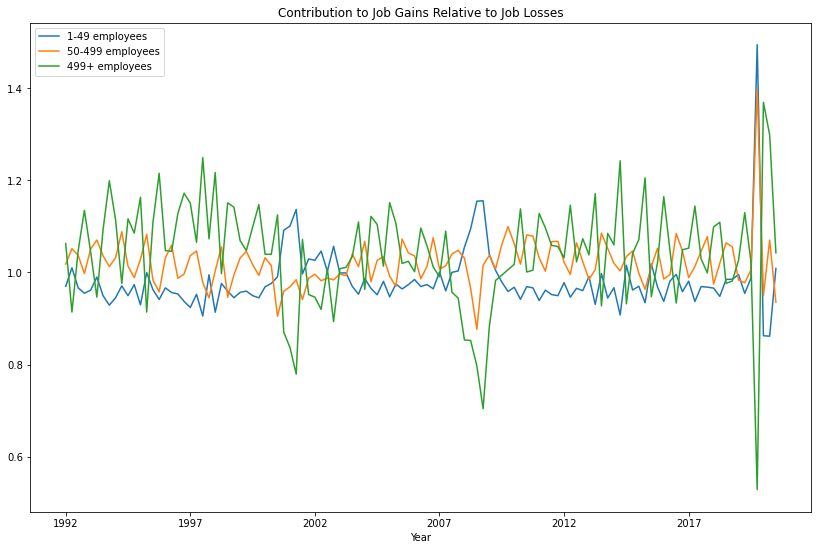

In [33]:
contribution_line = create_line(small_firm, medium_firm, large_firm, 'Gains Relative to Losses', 
                               'Contribution to Job Gains Relative to Job Losses')

## 3. Line Chart: data sourced from Job Openings and Labor Turnover Survey (JOLTS)

### 3.1 Import and process data

In [34]:
def read_xlsx(path:str) -> pd.DataFrame:
    """
    This function will read in the traget data file, and skip the first 13 rows.
    :param path: The url of target data file.
    :return: A pandas DataFrame contains data form target datad file.
    >>> df = read_xlsx('/Users/mac/PycharmProjects/pythonProject8/Data Simple from JOLTS.xlsx')
    >>> print(df)
          Year     Jan     Feb     Mar  ...     Sep     Oct    Nov    Dec
    0   2000.0     NaN     NaN     NaN  ...     NaN     NaN    NaN  567.0
    1   2001.0   752.0   635.0   602.0  ...   580.0   543.0  495.0  408.0
    2   2002.0   520.0   271.0   365.0  ...   287.0   310.0  343.0  286.0
    3   2003.0   302.0   361.0   302.0  ...   252.0   335.0  407.0  452.0
    4   2004.0   339.0   364.0   458.0  ...   535.0   516.0  407.0  612.0
    5   2005.0   465.0   557.0   486.0  ...   505.0   467.0  456.0  482.0
    6   2006.0   510.0   460.0   515.0  ...   368.0   388.0  433.0  436.0
    7   2007.0   510.0   572.0   566.0  ...   552.0   637.0  427.0  454.0
    8   2008.0   515.0   411.0   489.0  ...   402.0   388.0  412.0  414.0
    9   2009.0   334.0   408.0   274.0  ...   309.0   274.0  328.0  266.0
    10  2010.0   340.0   311.0   271.0  ...   315.0   404.0  419.0  381.0
    11  2011.0   392.0   318.0   373.0  ...   431.0   418.0  369.0  498.0
    12  2012.0   598.0   416.0   454.0  ...   455.0   409.0  442.0  358.0
    13  2013.0   400.0   476.0   492.0  ...   506.0   499.0  397.0  524.0
    14  2014.0   504.0   504.0   475.0  ...   536.0   594.0  582.0  693.0
    15  2015.0   640.0   864.0   724.0  ...   699.0   770.0  849.0  711.0
    16  2016.0   740.0   677.0   852.0  ...   664.0   654.0  698.0  741.0
    17  2017.0   613.0   762.0   677.0  ...   849.0   787.0  791.0  753.0
    18  2018.0   752.0   726.0   769.0  ...   877.0  1007.0  904.0  849.0
    19  2019.0   840.0   706.0   913.0  ...   947.0   899.0  891.0  858.0
    20  2020.0  1032.0  1027.0   869.0  ...   749.0   850.0  860.0  828.0
    21  2021.0  1086.0  1024.0  1065.0  ...  1573.0     NaN    NaN    NaN
    <BLANKLINE>
    [22 rows x 13 columns]
    """
    xlsx_to_df = pd.read_excel(path, skiprows=13)
    return xlsx_to_df

jplt_class1 = read_xlsx('SeriesReport-1.xlsx')
jplt_class2 = read_xlsx('SeriesReport-2.xlsx')
jplt_class3 = read_xlsx('SeriesReport-3.xlsx')
jplt_class4 = read_xlsx('SeriesReport-4.xlsx')
jplt_class5 = read_xlsx('SeriesReport-5.xlsx')
jplt_class6 = read_xlsx('SeriesReport-6.xlsx')
jplt_class1

/Users/Sure/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,567
1,2001,752,635,602,436,507,533,514,546,580,543,495,408
2,2002,520,271,365,309,389,338,211,321,287,310,343,286
3,2003,302,361,302,369,404,397,334,299,252,335,407,452
4,2004,339,364,458,421,443,325,522,469,535,516,407,612
5,2005,465,557,486,562,462,414,539,521,505,467,456,482
6,2006,510,460,515,516,442,457,332,463,368,388,433,436
7,2007,510,572,566,532,473,675,524,603,552,637,427,454
8,2008,515,411,489,437,350,460,477,370,402,388,412,414
9,2009,334,408,274,250,307,248,200,253,309,274,328,266


### 3.2 Calculate job openings group by year and month based on firm size

In [35]:
small_jplt = jplt_class1 + jplt_class2  # 1-49 employees
medium_jplt = jplt_class3  # 50-249 employees
large_jplt = jplt_class4 + jplt_class5 + jplt_class6  # 250+ employees

def create_jplt(jplt_df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    This function is to convert head line into a column and reset the index, use (year,month) as DataFrame's index.
    :param jplt_df: A DataFrame contains the number of each year and each month's job openings of different type of company.
    :param column_name: Name of used column.
    :return: A DataFrame with (year,month) as its index
    """
    jplt_df['Year'] = jplt_class1['Year']
    jplt_df = jplt_df.set_index(['Year'])
    jplt_df = jplt_df.stack().reset_index(level=1, name=column_name
                                         ).rename(columns={'level_1':'Month'})[['Month', column_name]]
    jplt_df.reset_index(level=0, inplace=True)
    jplt_df = jplt_df.set_index(['Year','Month'])
    
    return jplt_df


small_jplt = create_jplt(small_jplt, '1-49 employees')
medium_jplt = create_jplt(medium_jplt, '50-249 employees')
large_jplt = create_jplt(large_jplt, '250+ employees')
jplt = pd.concat([small_jplt, medium_jplt, large_jplt], axis=1)  # Merge three columns together

# Calculate the contribution of job openings for each firm size
jplt_contribution = jplt.div(jplt.sum(axis=1), axis=0)  
jplt_contribution

1-49 employees  50-249 employees  250+ employees
Year Month                                                  
2000 Dec                 0                 0               0
2001 Jan                 0                 0               0
     Feb                 0                 0               0
     Mar                 0                 0               0
     Apr                 0                 0               0
...                    ...               ...             ...
2021 May                 0                 0               0
     Jun                 0                 0               0
     Jul                 0                 0               0
     Aug                 0                 0               0
     Sep                 0                 0               0

[250 rows x 3 columns]

### 3.3 Line chart visualization
Only the line of 250+ employees is the same as the line in the paper.

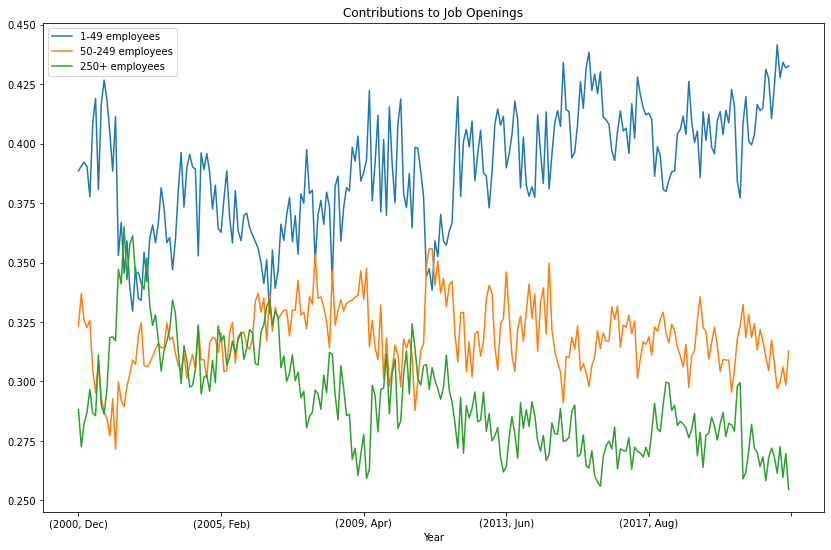

In [36]:
contributions_job_openings = jplt_contribution.plot.line(figsize=(14,9), title='Contributions to Job Openings', 
                                                         xlabel='Year')

## 4. Hypotheses

### 4.1 Function to compare the data of two dataframes

In [37]:
def create_contrast(df1: pd.DataFrame, df2: pd.DataFrame, title: str, tail_num: int):
    """
    This funcion will help draw the plot that reveals the relationship between companies' net change situation and
    the pademic.
    :param df1: A data frame containing the net change situation of the three companies。
    :param df2: A data frame about covid related info.
    :param title: The name of the plot.
    :param tail_num: The number Used to control the intervals displayed in the graph.
    :return: A line chart reveals the relationship between companies' net change situation and the pademic.
    """
    hypo_df = pd.merge(df1, df2, on=['Year','Month'], how='left')
    hypo_df = hypo_df.set_index(['Year','Month'])
    hypo_line = hypo_df.tail(tail_num).plot.line(figsize=(14,9), title=title, xlabel='Year')
    
    return hypo_line

### 4.2.1 Hypothesis 1: the number of Covid-19 cases in the United States is negatively correlated with job gains in the beginning.

In [38]:
sum_firm = small_firm + medium_firm + large_firm  # Get the sum of the three sizes of firms
sum_firm['Year'] = small_firm['Year'].astype(int)
sum_firm['Month'] = small_firm['Month']
sum_firm = sum_firm.drop('Gains Relative to Losses', 1)
sum_firm

,Year,Month,Net Change,Total Job Gains,Total Job Losses
0,1992,September,694,6192,5498
1,1992,December,193,5912,5719
2,1993,March,340,5970,5630
3,1993,June,677,6069,5392
4,1993,September,1045,6433,5388
...,...,...,...,...,...
110,2020,March,-610,5659,6269
111,2020,June,1146,4494,13814
112,2020,September,3040,9459,5419
113,2020,December,1893,7092,5199


In [39]:
covidcase = pd.read_csv('daily_case_trends__the_united_states.csv', skiprows=2)

# Make the format of month the same as the one of sum_firm
month_dic = {'Jan':'March', 'Feb':'March', 'Mar':'March', 'Apr':'June', 'May':'June', 'Jun':'June', 'Jul':'September',
             'Aug':'September', 'Sep':'September', 'Oct':'December', 'Nov':'December', 'Dec':'December'}

# Create Year and Month columns
covidcase['Year'] = covidcase['Date'].str[-4:].astype(int)
covidcase['Month'] = covidcase['Date'].str[:3].map(month_dic)
covidcase['New Cases'] = covidcase['New Cases']/1000  # Convert to thousands

# Get the sum of new cases group by year and month
covidcase = pd.DataFrame(covidcase.groupby(['Year','Month'])['New Cases'].sum()).reset_index(level=['Year','Month'])
covidcase

,Year,Month,New Cases
0,2020,December,12745
1,2020,June,2483
2,2020,March,213
3,2020,September,4641
4,2021,December,4868
5,2021,June,3134
6,2021,March,10226
7,2021,September,9728


In [40]:
sum_firm_jobgains = sum_firm.drop(sum_firm.columns[[2,4]], axis=1)
sum_firm_jobgains

,Year,Month,Total Job Gains
0,1992,September,6192
1,1992,December,5912
2,1993,March,5970
3,1993,June,6069
4,1993,September,6433
...,...,...,...
110,2020,March,5659
111,2020,June,4494
112,2020,September,9459
113,2020,December,7092


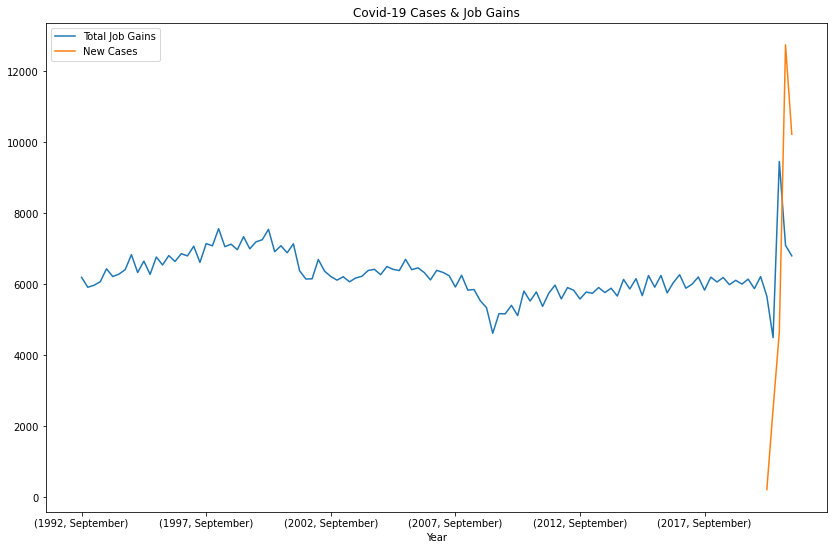

In [41]:
hypo_jobgain = create_contrast(sum_firm_jobgains, covidcase, 'Covid-19 Cases & Job Gains', len(sum_firm_jobgains))

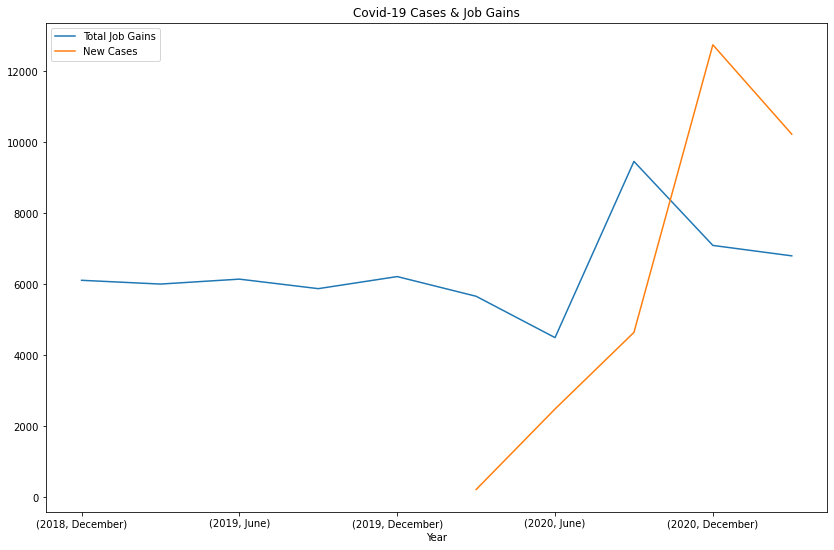

In [42]:
hypo_jobgain = create_contrast(sum_firm_jobgains, covidcase, 'Covid-19 Cases & Job Gains', 10)

### 4.2.2 Hypothesis 2: small firms have worse resilience capabilities during the epidemic.

In [43]:
all_firm = small_firm.drop(small_firm.columns[[3,4,5]], axis=1).rename({'Net Change':'Net Change of Small Firm'}, 
                                                                       axis=1)
all_firm['Year'] = all_firm['Year'].astype(int)
all_firm['Net Change of Medium Firm'] = medium_firm['Net Change']
all_firm['Net Change of Large Firm'] = large_firm['Net Change']
all_firm

,Year,Month,Net Change of Small Firm,Net Change of Medium Firm,Net Change of Large Firm
0,1992,September,282,197,215
1,1992,December,137,122,-66
2,1993,March,77,138,125
3,1993,June,225,162,290
4,1993,September,439,330,276
...,...,...,...,...,...
110,2020,March,-368,-129,-113
111,2020,June,-474,906,714
112,2020,September,1505,769,766
113,2020,December,521,505,867


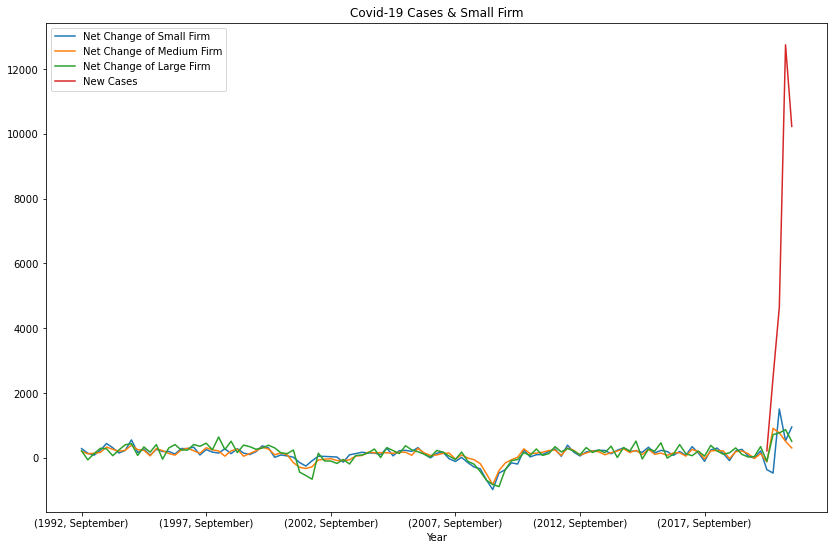

In [44]:
hypo_smallfirm = create_contrast(all_firm, covidcase, 'Covid-19 Cases & Small Firm', len(all_firm))

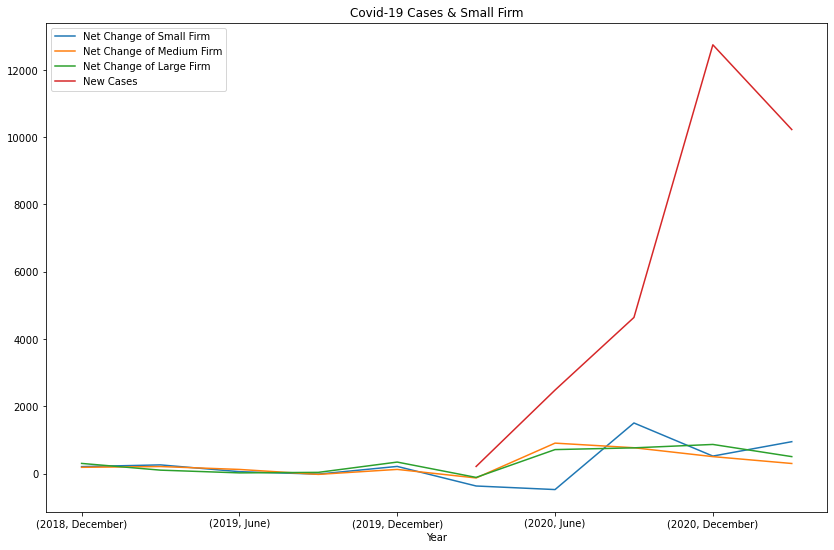

In [45]:
hypo_smallfirm = create_contrast(all_firm, covidcase, 'Covid-19 Cases & Small Firm', 10)

### 4.3 Hypothesis 3: the increase in the coverage of the Covid-19 vaccination does not bring more job opportunities.

In [46]:
vaccinations = pd.read_csv('vaccinations_in_the_us.csv', skiprows=2)

# Make the format of month the same as the one of sum_firm
month_dic = {'01':'March', '02':'March', '03':'March', '04':'June', '05':'June', '06':'June', '07':'September',
             '08':'September', '09':'September', '10':'December', '11':'December', '12':'December'}

# Create Year and Month columns
vaccinations['Year'] = vaccinations['Date'].str[:4].astype(int)
vaccinations['Month'] = vaccinations['Date'].str[5:7].map(month_dic)
vaccinations = vaccinations[vaccinations['Total Doses Administered Daily'].notna()]
vaccinations['Daily Doses'] = vaccinations['Total Doses Administered Daily']/10000

# Get the sum of daily doses group by year and month
vaccinations = pd.DataFrame(vaccinations.iloc[:, -3:].groupby(['Year','Month'])['Daily Doses'].
                            sum()).reset_index(level=['Year','Month'])
vaccinations

,Year,Month,Daily Doses
0,2020,December,559
1,2021,December,6260
2,2021,June,16499
3,2021,March,16547
4,2021,September,6211


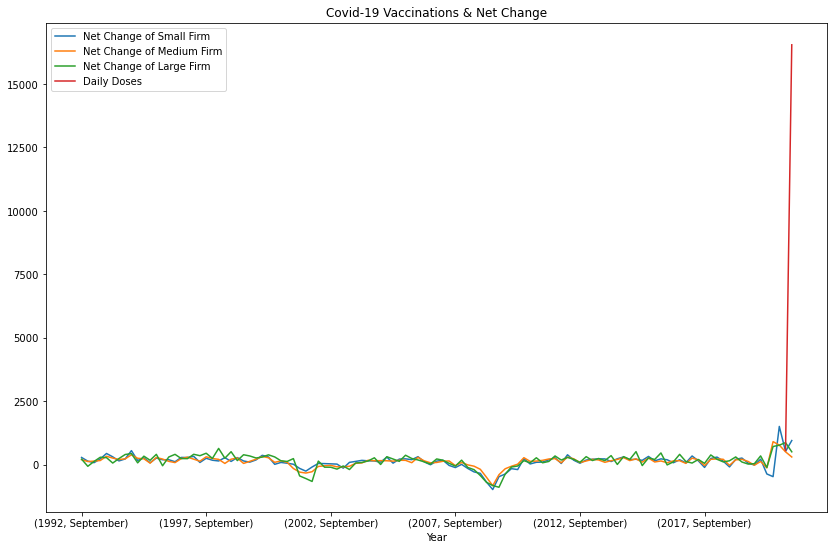

In [47]:
hypo_vaccine = create_contrast(all_firm, vaccinations, 'Covid-19 Vaccinations & Net Change', len(all_firm))

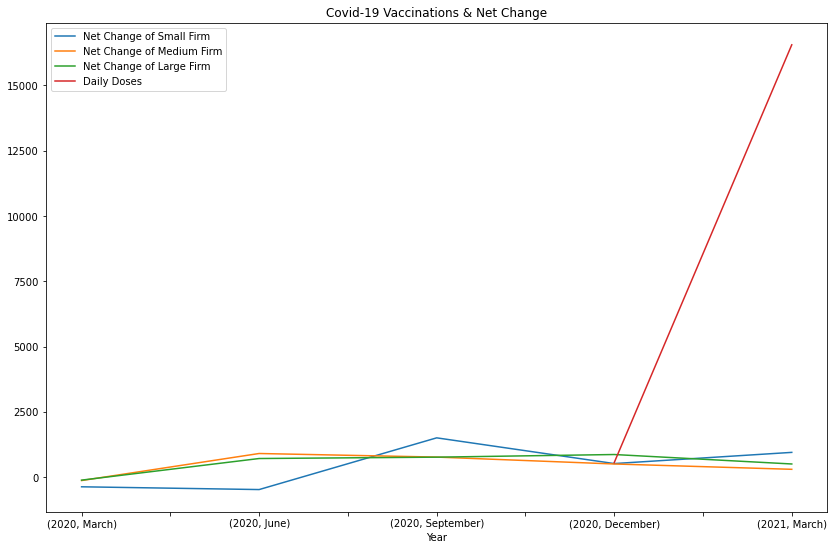

In [48]:
hypo_vaccine = create_contrast(all_firm, vaccinations, 'Covid-19 Vaccinations & Net Change', 5)